# 1. 全局设置

In [1]:
# 导入包并且确保包的版本符合要求
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

np.set_printoptions(suppress = True)
# 配置全局绘图设置
%matplotlib widget
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('font', family = 'simhei')
mpl.rc('font', size = 16)
mpl.rc('axes', unicode_minus = False)

# 保存图片的位置
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 如果项目文件夹不存在，就创建一个
os.makedirs(IMAGES_PATH, exist_ok = True)

# 将图片保存到指定位置
def save_fig(fig, fig_id, tight_layout=True, fig_extension="png", dpi=300):
    '''
    将图片保存到指定位置
    
    :param fig: 当前图片的Figure对象；
    :param fig_id: 保存的文件名；
    :param tight_layout: 是否使用tight layout，默认是True
    :param fig_extension: 图片的扩展名，默认是'png'
    :param resolution: 图片的像素点个数
    :return:
    '''
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    fig.set_tight_layout(tight_layout)
    fig.savefig(path, format=fig_extension, dpi=dpi)
    print('图片已保存', fig_id)

# 2. 获取数据

## 2.1. 下载数据

In [2]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 将线上数据文件保存到本地，记得连vpn
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    '''
    将线上数据文件保存到本地
    在本地创建一个housing_path文件夹，其中放置了housing_url指向的housing.tgz文件
    然后将其中内容解压到housing_path文件夹中
    
    :param housing_url: 线上数据压缩包地址
    :param housing_path: 用来存放压缩包和解压后数据的本地地址；
    :return:
    '''
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    # 将线上数据压缩包下载到本地文件夹中
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    # 将数据压缩包解压，可以获得housing.csv文件
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print('数据下载已完成')
    
fetch_housing_data()

数据下载已完成


In [3]:
# 用来加载本地房价数据
def load_housing_data(housing_path = HOUSING_PATH)->pd.DataFrame:
    '''
    用来加载本地房价数据
    
    :param housing_path: 本地房价数据文件地址
    :return: 房价数据
    '''
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

load_housing_data()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2.2. 大致查看一下数据的情况

In [4]:
housing = load_housing_data()
# 可以看到ocean_proximity是字符数据，其可能是分类属性
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# 数据总览
# 可以看到total_bedrooms只有20433数据，可能是缺失数据
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 查看ocean_proximity变量有几种类别
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


图片已保存 变量直方分布图


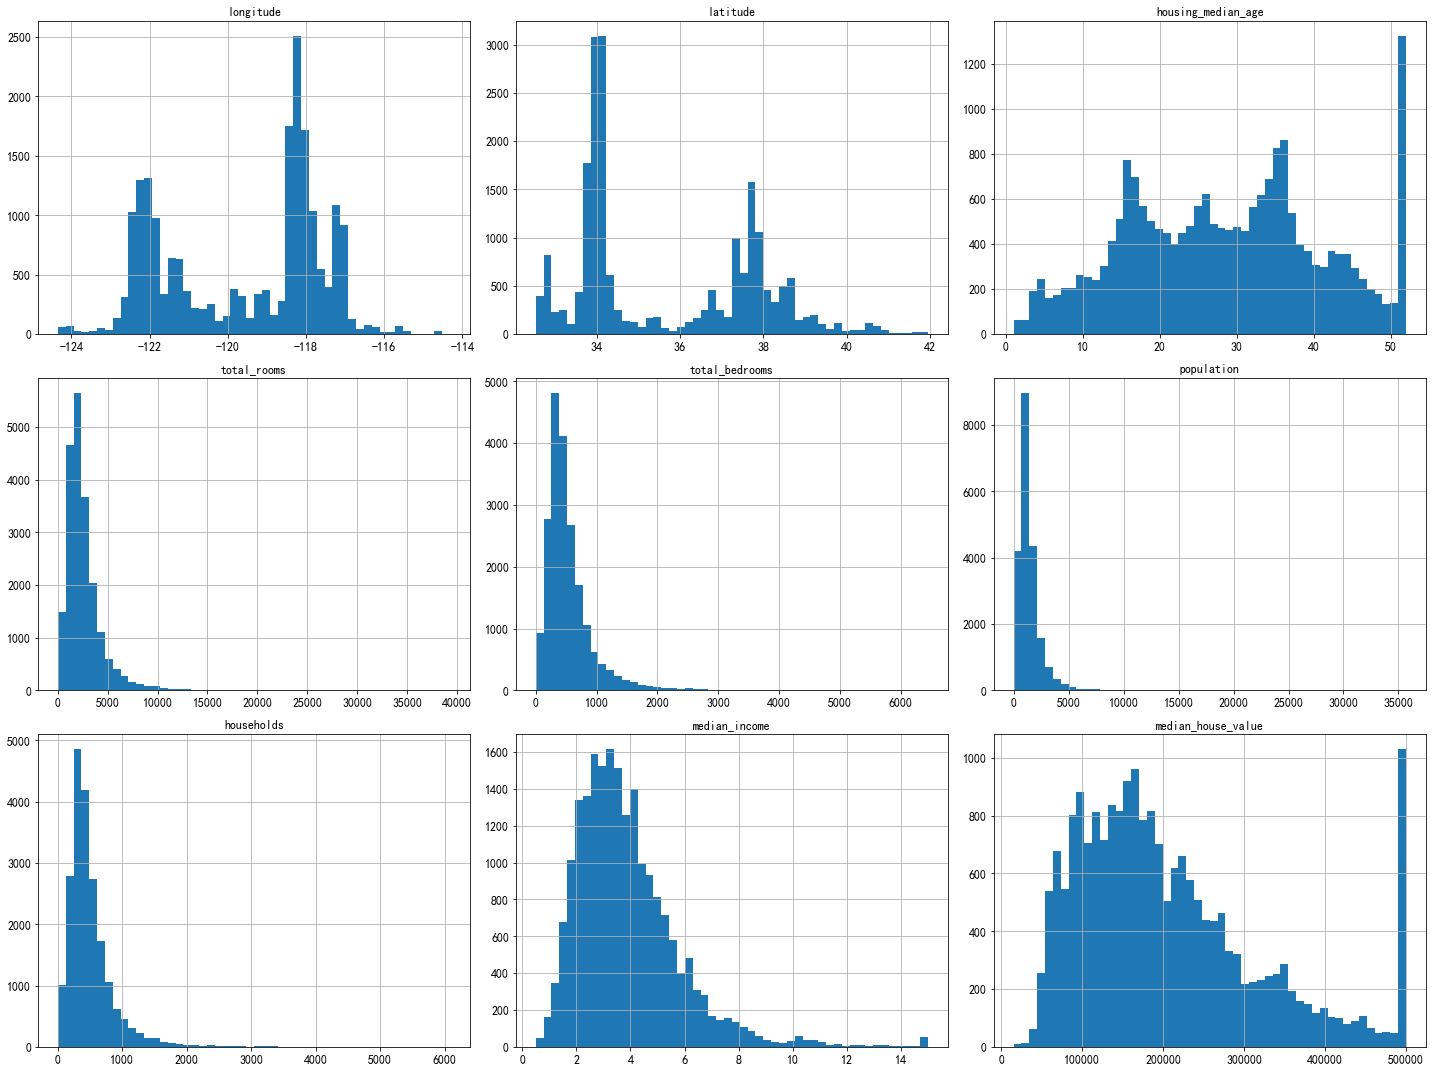

In [8]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
fig = plt.gcf()
save_fig(fig, '变量直方分布图')

## 2.3. 划分测试集

In [9]:
# 按收入的区间分成5个层级、类别
# 这个指标将用于稍后的随机抽样和分层抽样的比对
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# 这是全部数据中的各层级样本数占比
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [10]:
# 这是随机抽样
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3


In [11]:
# 看看随机抽样得到的测试集中各收入层级的样本比例
test_set["income_cat"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [12]:
# 这是分层抽样
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# 确保测试集中各收入层级的样本频率与全部样本数据中保持一致（或尽可能一致）
train_index, test_index = tuple(split.split(housing, housing["income_cat"]))[0]
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

strat_test_set[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3


In [13]:
# 看看分层抽样得到的测试集中各收入层级的样本比例
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [14]:
# 比对一下随机抽样和分层抽样测试集在各个收入层级中的样本比例
# 以及抽样测试集中各层级样本比例与完整数据集中的比例误差是多少

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "总体分布": income_cat_proportions(housing),
    "分层": income_cat_proportions(strat_test_set),
    "随机": income_cat_proportions(test_set),
}).sort_index()
compare_props["随机. %误差"] = 100 * compare_props["随机"] / compare_props["总体分布"] - 100
compare_props["分层. %误差"] = 100 * compare_props["分层"] / compare_props["总体分布"] - 100

compare_props.style.set_caption('随机抽样 vs. 分层抽样；可见分层抽样的误差最小')

,总体分布,分层,随机,随机. %误差,分层. %误差
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [15]:
# 别忘了把刚才的income_cat变量从训练集和测试集中剔除
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3. 从数据可视化中获得启发

In [16]:
# 暂时不需要使用测试集了，现在只用训练集就行
housing = strat_train_set.copy()

## 3.1. 将地理数据可视化

In [17]:
# 下载加州地图图片
images_path = images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
print("下载已完成", filename)

下载已完成 california.png


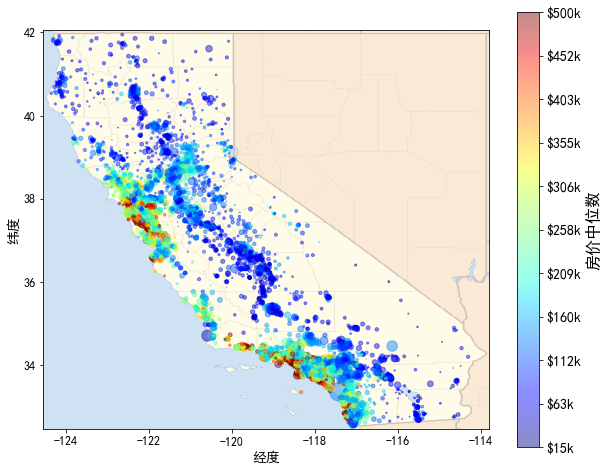

In [18]:
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize = (10, 8))

scatter = ax.scatter(housing['longitude'], housing['latitude'],  alpha = 0.45, s = housing['population']/100, 
                     c = housing['median_house_value'], cmap = plt.get_cmap("jet"))
ax.set_xlabel('经度')
ax.set_ylabel('纬度')

# 读取图片
california_img = mpimg.imread(os.path.join(images_path, filename))
ax.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5)

# 配一个色带
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = fig.colorbar(scatter)
cbar.ax.set_yticks(ticks = tick_values, labels = ["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('房价中位数', fontsize=16)

#save_fig(fig, "加利福尼亚房价可视化")

## 3.2. 看看相关性

In [19]:
# 可以发现，和房价中位数相关性最好的就是收入中位数了，这也是情理之中
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

图片已保存 散点图


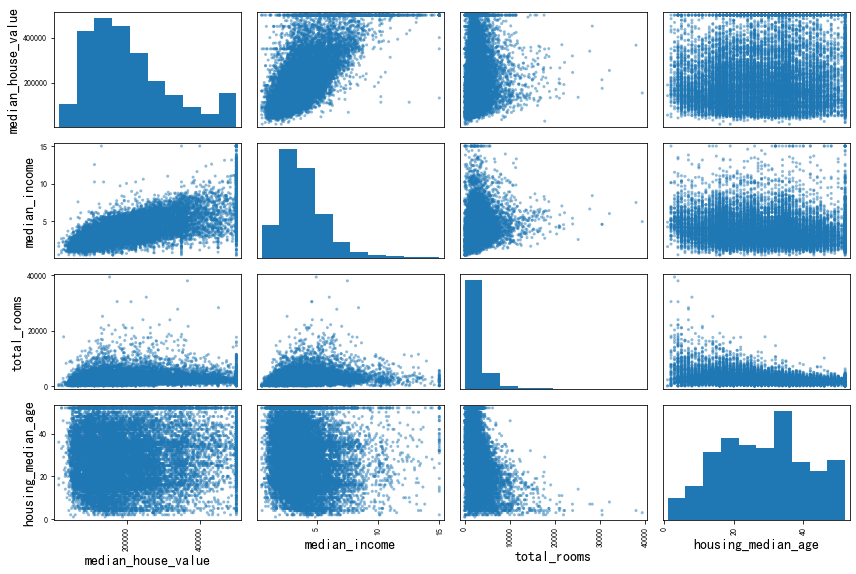

In [20]:
from pandas.plotting import scatter_matrix

# 看看散点图，只看相关性比较好的收入中位数、总房间数、房龄中间值就行了
# 可以看到收入中位数与房价中位数的相关性非常明显，虽然可能有些异常值，这些异常值可以在之后清理掉
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
fig = plt.gcf()
save_fig(fig, "散点图")

图片已保存 收入_vs_房价


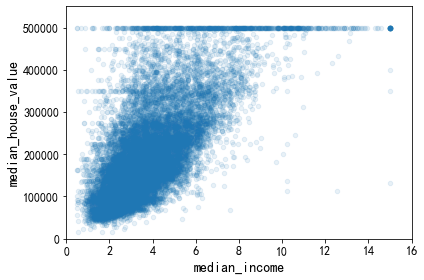

In [21]:
# 重点看看收入中位数和房价中位数之间的关系
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig(plt.gcf(), "收入_vs_房价")

## 3.3. 测试变量组合的效果

In [22]:
# 生成了三个新的变量：平均每户人家的房间数、所有房间中卧室的占比、家庭人数
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [23]:
# 可以看到的是，新生成的rooms_per_household和bedrooms_per_room表现非常突出
# 这其实是非常合常理的，每户人家的房间越多，房价就越高；一户人家中卧室占所有房间的比重越小，房价越高；
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

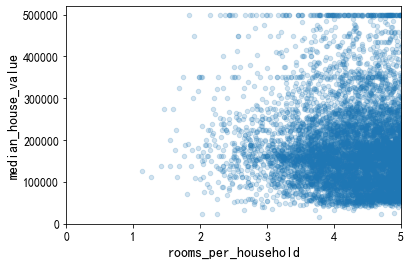

In [24]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 4. 数据预处理

In [26]:
# 把训练集的目标变量median_house_value和其他特征变量分开
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## 4.1. 数据清洗

之前大概浏览数据的时候看到total_bedrooms变量有一些缺失值；  
 <br/>以下是处理缺失值的三种可选的方法

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [27]:
# 但是还是推荐使用sklearn自带的一个处理缺失值的转换器
from sklearn.impute import SimpleImputer
# 设置填充缺失值的策略：使用中位数进行填充
imputer = SimpleImputer(strategy="median")

In [28]:
# 在进行填充之前，要先把ocean_proximity变量去掉，因为这是字符串类型的数据，没法计算中位数
housing_num = housing.drop("ocean_proximity", axis=1)

In [29]:
# 就不分步来操作了，直接转换就好了，这里的X是numpy数组
X = imputer.fit_transform(housing_num)

In [30]:
# 可通过转换器的属性看到各列的中位数
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
# 这与手动计算的各列的中位数毫无疑问是一样的
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
# 这就是转换完之后的训练集特征变量了
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750


## 4.2. 转换文字或类别变量

In [33]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [34]:
# 可以按照类别的字母排序将类别转换成整型数字，但是这么做可能会有缺点
# 有可能本来相关性相差甚远的两个类别（一个变量中的两个类别）在转换成整型数字之后相关性反而会提高
# 这样可能会影响机器学习算法的效果
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [35]:
# 可以看到ocean_proximity变量值各类别的排序
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
# 因为ocean_proximity变量的类别也不是太多，所以可以使用独热编码转换
# 转换之后的矩阵是scipy的稀疏矩阵，不能直接输出
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
# 可以用这样的方法来输出
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
# 当然也可以直接设置OneHotEncoder转换器的超参数
# 直接输出转换后的稀疏矩阵，这样就不用toarray方法了
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [39]:
# 也可以看到所有的类别
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 4.3. 自定义一个转换器

In [40]:
# 这个自定义的转换器的作用就是可以添加组合变量，在3.3节中提过
from sklearn.base import BaseEstimator, TransformerMixin

# 几个关键变量列索引
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        # 选择是否添加bedrooms_per_room组合变量
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## 4.4. 转换Pipeline

In [41]:
# 做一个针对数字类型数据的转换器Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # 缺失值用中间值填充
        ('attribs_adder', CombinedAttributesAdder()), # 增加组合变量
        ('std_scaler', StandardScaler()), # 数据标准化
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [42]:
housing_num_tr[:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252]])

In [43]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # 对数字列执行的操作、这里转换完输出的数据是个密集矩阵
        ("cat", OneHotEncoder(), cat_attribs), # 对类型或字符串列执行的操作、这里输出的是个稀疏矩阵(独热编码嘛)
    ])

# 这里要注意的一点是，这里的full_pipeline最后会将一个密集矩阵和一个稀疏矩阵拼接起来
# 最终输出的矩阵有可能是密集矩阵，也有可能是稀疏矩阵，这要取决于最终集成矩阵的非零比率
housing_prepared = full_pipeline.fit_transform(housing)

In [44]:
# 顺便一提，本案例中最终输出的矩阵是密集矩阵，可以看到矩阵的后几列都是0或1，这就是独热编码
housing_prepared[:3]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])

# 5. 选择并训练模型

## 5.1. 使用训练集评估模型

In [45]:
# 先来个比较基础的线性模型试试看效果
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
# 先抽训练集的前5行看看RMSE
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# 这就是5行预处理之后的输入数据了
some_data_prepared = full_pipeline.transform(some_data)

In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
lin_rmse

68627.87390018745

In [48]:
# 这次来试试决策树模型
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared = False)
tree_rmse

0.0

## 5.2. 交叉验证

In [50]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
# 在sklearn中，交叉验证最好使用的效用函数(即越大越好)，而不是损失函数(越小越好)
# 这就是为什么使用负的MAE作为指标
tree_rmse_scores = np.sqrt(-scores)

In [51]:
# 展示交叉验证的函数
def display_scores(scores):
    print("RMSE:", pd.Series(scores, 
                             index = pd.RangeIndex(start=1, stop=11, step=1, name='验证次数'), 
                             name = 'RMSE'))
    print("RMSE均值:", scores.mean())
    print("误差标准差:", scores.std())

display_scores(tree_rmse_scores)

RMSE: 验证次数
1     72831.457491
2     69973.184383
3     69528.565514
4     72517.782298
5     69145.500069
6     79094.741237
7     68960.045444
8     73344.502257
9     69826.024739
10    71077.097540
Name: RMSE, dtype: float64
RMSE均值: 71629.89009727491
误差标准差: 2914.035468468928


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

RMSE: 验证次数
1     71762.763644
2     64114.991664
3     67771.171244
4     68635.190721
5     66846.140895
6     72528.037254
7     73997.080502
8     68802.336293
9     66443.288369
10    70139.799240
Name: RMSE, dtype: float64
RMSE均值: 69104.07998247063
误差标准差: 2880.328209818069


In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [54]:
# 来看看在训练集中的误差是多少
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print('在训练集中的误差是：', forest_rmse)

在训练集中的误差是： 18650.698705770003


In [55]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

RMSE: 验证次数
1     51559.633796
2     48737.571001
3     47210.512698
4     51875.212473
5     47577.504701
6     51863.274679
7     52746.346456
8     50065.176275
9     48664.668182
10    54055.908946
Name: RMSE, dtype: float64
RMSE均值: 50435.58092066179
误差标准差: 2203.3381412764606


# 6. 微调模型

## 6.1. 网格搜索

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 尝试 12 (3×4) 种超参数组合
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # 尝试 6 (2×3) 种超参数组合，设置bootstrap参数为False
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 5折交叉验证，也就是说总共要进行 (12+6)*5=90 次模型训练
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
# 这个就是最好的参数
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [58]:
# 还有最好的评估器，基于最好的参数
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [59]:
# 当然还可以看到每组超参数的表现
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

## 6.2. 随机搜索

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        # 注意这里的randint是一个scipy.stats.rv_discrete的一个实例，其可以返回基于特定分布的随机整型数据
        # 算是一个生成器吧，这样就可以看到一个随机数了：randint(low=1, high=200).rvs()
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
# 每个参数分配到10个随机值
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020114FFB460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020115008910>},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
# 来看看随机搜索的效果
# 可以看到，使用随机搜索的效果甚至还不错，似乎比网格搜索的效果更好，最好的模型RMSE误差只有49117左右
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## 6.3. 变量重要度(或者叫贡献度也没问题)

In [74]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06965425, 0.06042138, 0.04218822, 0.01524506, 0.01555453,
       0.01584911, 0.01493466, 0.37900922, 0.05477892, 0.10703132,
       0.04820312, 0.00679266, 0.1657063 , 0.00007835, 0.00152473,
       0.00302816])

In [76]:
# 来结合变量名看看重要度
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
# 先整合一下数字和字符串以及组合变量名
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]